In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd '/content/drive/My Drive/CV Project/SSD'

/content/drive/My Drive/CV Project/SSD


In [3]:
!ls

 config				      __pycache__
 data				      SSD
 dataset			     'SSD detect.ipynb'
'detect Faster RCNN notebook.ipynb'   svm
 Evaluation.ipynb		     'Train Faster RCNN notebook.ipynb'
 faster_rcnn			     'Train SSD.ipynb'
 loss.txt			      utils.py
 model				      widerface_evaluate


In [4]:
! mkdir '/content/data'

In [5]:
! unrar x '/content/drive/My Drive/CV Project/SSD/dataset/wider_face.rar'  '/content/data/'

Streaming output truncated to the last 5000 lines.
Extracting  /content/data/wider_face/train/images/55--Sports_Coach_Trainer/55_Sports_Coach_Trainer_sportcoaching_55_480.jpg      83%  OK 
Extracting  /content/data/wider_face/train/images/55--Sports_Coach_Trainer/55_Sports_Coach_Trainer_sportcoaching_55_49.jpg      83%  OK 
Extracting  /content/data/wider_face/train/images/55--Sports_Coach_Trainer/55_Sports_Coach_Trainer_sportcoaching_55_491.jpg      83%  OK 
Extracting  /content/data/wider_face/train/images/55--Sports_Coach_Trainer/55_Sports_Coach_Trainer_sportcoaching_55_494.jpg      83%  OK 
Extracting  /content/data/wider_face/train/images/55--Sports_Coach_Trainer/55_Sports_Coach_Trainer_sportcoaching_55_498.jpg      83%  OK 
Extracting  /content/data/wider_face/train/images/55--Sports_Coach_Trainer/55_Sports_Coach_Trainer_sportcoaching_55_501.jpg      83%  OK 
Extracting  /content/data/wider_face/train/images/55--Sports_Coach_T

In [7]:
from torchvision import transforms
from utils import *
from PIL import Image, ImageDraw, ImageFont
import cv2
import numpy as np
from PIL import Image, ImageDraw, ImageFont
from matplotlib import font_manager
import os
import torch
import yaml
from tqdm.notebook import tqdm





In [8]:
from SSD.model import SSD300

with open("./config/ssd.yaml", "r") as f:
    config = yaml.safe_load(f)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


checkpoint = config['checkpoint']
checkpoint = torch.load(checkpoint)

model =  SSD300(n_classes=2)
model.load_state_dict(checkpoint['model'])
model = model.to(device)
print(config)


/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]


Loaded base model.

{'checkpoint': './model/checkpoint_ssd300.pth.tar', 'batch_size': 16, 'iterations': 60000, 'workers': 2, 'print_freq': 200, 'lr': '1e-4', 'momentum': 0.9, 'decay_lr_at': [40000, 50000], 'decay_lr_to': 0.1, 'weight_decay': '5e-4', 'n_classes': 2}


In [11]:
from SSD.detect import detect_ssd

/content/drive/My Drive/CV Project/SSD/SSD/model.py:492: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  ../aten/src/ATen/native/IndexingUtils.h:27.)
  image_boxes.append(class_decoded_locs[1 - suppress])
/content/drive/My Drive/CV Project/SSD/SSD/model.py:494: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  ../aten/src/ATen/native/IndexingUtils.h:27.)
  image_scores.append(class_scores[1 - suppress])


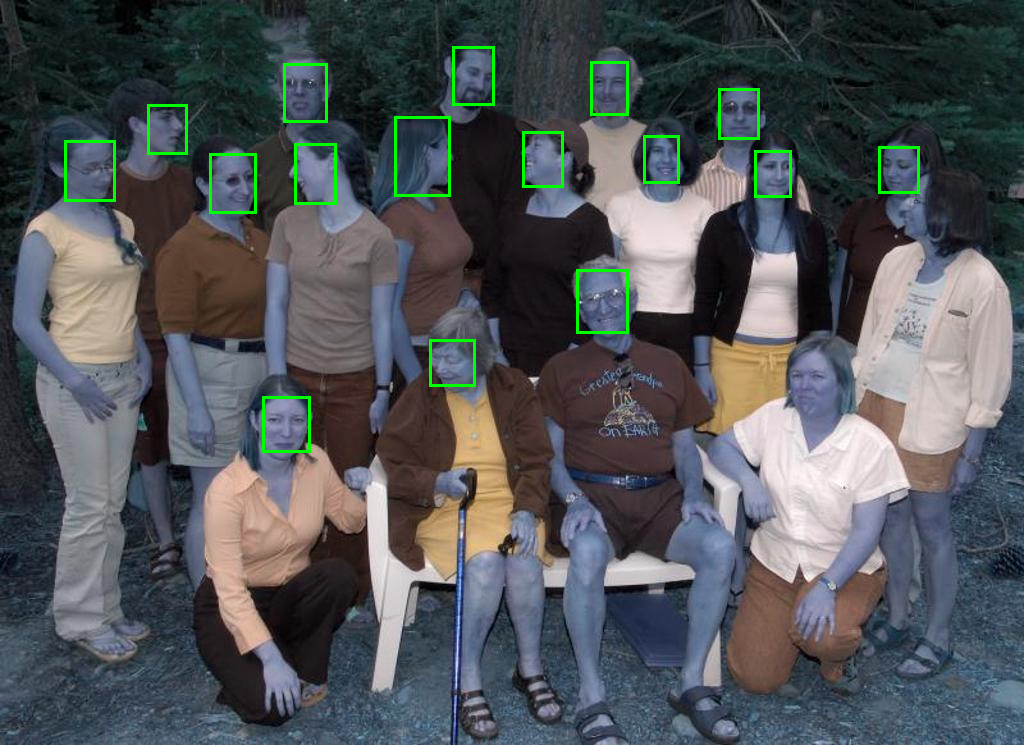

In [12]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from IPython.display import display # to display images

img_path = '/content/data/wider_face/train/images/6--Funeral/6_Funeral_Funeral_6_383.jpg'
# img_path = '/content/data/wider_face/train/images/55--Sports_Coach_Trainer/55_Sports_Coach_Trainer_sportcoaching_55_6.jpg'
# img_path = '/content/data/wider_face/train/images/55--Sports_Coach_Trainer/55_Sports_Coach_Trainer_sportcoaching_55_573.jpg'
img_path = '/content/data/wider_face/train/images/52--Photographers/52_Photographers_photographertakingphoto_52_339.jpg'
# img_path = '/content/data/wider_face/train/images/47--Matador_Bullfighter/47_Matador_Bullfighter_matadorbullfighting_47_770.jpg'
# img_path = '/content/data/wider_face/train/images/47--Matador_Bullfighter/47_Matador_Bullfighter_matadorbullfighting_47_644.jpg'
# img_path = '/content/data/wider_face/train/images/12--Group/12_Group_Group_12_Group_Group_12_51.jpg'
img_path = '/content/data/wider_face/train/images/12--Group/12_Group_Large_Group_12_Group_Large_Group_12_731.jpg'
# img_path = '/content/data/wider_face/val/images/13--Interview/13_Interview_Interview_Sequences_13_33.jpg'


# original_image = Image.open(img_path, mode='r')
# original_image = original_image.convert('RGB')
# display(original_image)
original_image = cv2.imread(img_path)
annotated_im = detect_ssd(model, original_image, min_score=0.3, max_overlap=0.5, top_k=200, visualize = True)
display(annotated_im)


In [13]:
from SSD.model import SSD300

with open("./config/ssd.yaml", "r") as f:
    config = yaml.safe_load(f)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


checkpoint = config['checkpoint']
checkpoint = torch.load(checkpoint)

model =  SSD300(n_classes=2)
model.load_state_dict(checkpoint['model'])
model = model.to(device)
print(config)


/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)



Loaded base model.

{'checkpoint': './model/checkpoint_ssd300.pth.tar', 'batch_size': 16, 'iterations': 60000, 'workers': 2, 'print_freq': 200, 'lr': '1e-4', 'momentum': 0.9, 'decay_lr_at': [40000, 50000], 'decay_lr_to': 0.1, 'weight_decay': '5e-4', 'n_classes': 2}


In [16]:
with open('/content/data/wider_face/val/wider_val.txt', 'r') as f:
  val_images = f.read().splitlines()

print(val_images[0:5])

['/24--Soldier_Firing/24_Soldier_Firing_Soldier_Firing_24_329.jpg', '/24--Soldier_Firing/24_Soldier_Firing_Soldier_Firing_24_10.jpg', '/24--Soldier_Firing/24_Soldier_Firing_Soldier_Firing_24_1037.jpg', '/24--Soldier_Firing/24_Soldier_Firing_Soldier_Firing_24_115.jpg', '/24--Soldier_Firing/24_Soldier_Firing_Soldier_Firing_24_129.jpg']


In [ ]:
pred_dir = './widerface_evaluate/detection_results/ssd'
pred_dir = './widerface_evaluate/predictions/ssd'

for img_name in tqdm(val_images):
  img_path = '/content/data/wider_face/val/images' + img_name
  image = cv2.imread(img_path)
  # print(img_path)
  detections, probabilities = detect_ssd(model, image, min_score=0.02)
  num_faces = len(detections)

  pred_file = pred_dir + img_name[:-4] + ".txt"
  class_dir = "/".join(pred_file.split("/")[:-1] )

  if not os.path.isdir(class_dir):
    os.mkdir(class_dir)
  # print(pred_file[:-4])
  with open(pred_file, 'w') as f:
    file_name = pred_file.replace("/widerface_evaluate", "")[:-4]
    f.write( file_name+ '\n')
    f.write(str(num_faces) + '\n')

    for i  in range(num_faces):
      box = detections[i]
      confidence = probabilities[i]
      x_min, y_min = int(box[0]), int(box[1])
      w = int(box[2]) - int(box[0])
      h = int(box[3]) - int(box[1])
      line = str(x_min) + " " + str(y_min) + " " + str(w) + " " + str(h) + " " + str(confidence) + " \n"
      f.write(line)
      # print(line + \n)


  0%|          | 0/3226 [00:00<?, ?it/s]

/content/drive/My Drive/CV Project/SSD/SSD/model.py:492: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  ../aten/src/ATen/native/IndexingUtils.h:27.)
  image_boxes.append(class_decoded_locs[1 - suppress])
/content/drive/My Drive/CV Project/SSD/SSD/model.py:494: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  ../aten/src/ATen/native/IndexingUtils.h:27.)
  image_scores.append(class_scores[1 - suppress])


In [14]:
from SSD.model import SSD300

with open("./config/ssd_no_augment.yaml", "r") as f:
    config = yaml.safe_load(f)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


checkpoint = config['checkpoint']
checkpoint = torch.load(checkpoint)

model =  SSD300(n_classes=2)
model.load_state_dict(checkpoint['model'])
model = model.to(device)
print(config)


/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)



Loaded base model.

{'checkpoint': './model/checkpoint_ssd300_no_augment.pth.tar', 'batch_size': 16, 'iterations': 60000, 'workers': 2, 'print_freq': 200, 'lr': '1e-4', 'momentum': 0.9, 'decay_lr_at': [40000, 50000], 'decay_lr_to': 0.1, 'weight_decay': '5e-4', 'n_classes': 2}


In [17]:
pred_dir = './widerface_evaluate/predictions/ssd_no_augment'

for img_name in tqdm(val_images):
  img_path = '/content/data/wider_face/val/images' + img_name
  image = cv2.imread(img_path)
  # print(img_path)
  detections, probabilities = detect_ssd(model, image, min_score=0.02)
  num_faces = len(detections)

  pred_file = pred_dir + img_name[:-4] + ".txt"
  class_dir = "/".join(pred_file.split("/")[:-1] )

  if not os.path.isdir(class_dir):
    os.mkdir(class_dir)
  # print(pred_file[:-4])
  with open(pred_file, 'w') as f:
    file_name = pred_file.replace("/widerface_evaluate", "")[:-4]
    f.write( file_name+ '\n')
    f.write(str(num_faces) + '\n')

    for i  in range(num_faces):
      box = detections[i]
      confidence = probabilities[i]
      x_min, y_min = int(box[0]), int(box[1])
      w = int(box[2]) - int(box[0])
      h = int(box[3]) - int(box[1])
      line = str(x_min) + " " + str(y_min) + " " + str(w) + " " + str(h) + " " + str(confidence) + " \n"
      f.write(line)
      # print(line + \n)


  0%|          | 0/3226 [00:00<?, ?it/s]

/content/drive/My Drive/CV Project/SSD/SSD/model.py:492: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  ../aten/src/ATen/native/IndexingUtils.h:27.)
  image_boxes.append(class_decoded_locs[1 - suppress])
/content/drive/My Drive/CV Project/SSD/SSD/model.py:494: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  ../aten/src/ATen/native/IndexingUtils.h:27.)
  image_scores.append(class_scores[1 - suppress])
